In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("F:\Data science\Data Science projects(Data set and notebook)\Suven Internship\weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


### Data cleaning

In [4]:
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis=1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [5]:
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df = df.set_index('Formatted Date')
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


## Plotting Data


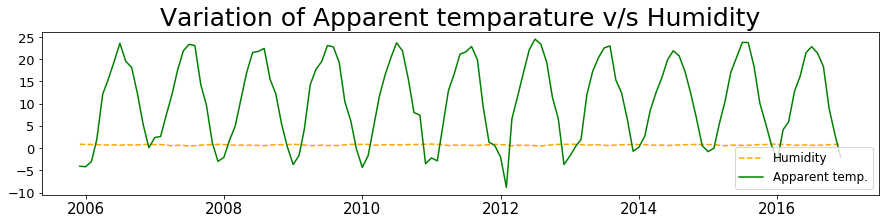

In [7]:
plt.figure(figsize=(15,3));
plt.plot(data['Humidity'], label = 'Humidity', color = 'orange',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'green');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13);

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

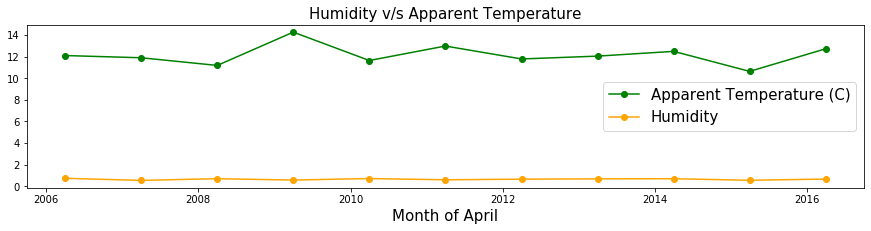

In [8]:
april = data[data.index.month==4]
plt.figure(figsize=(15,3))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## January

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

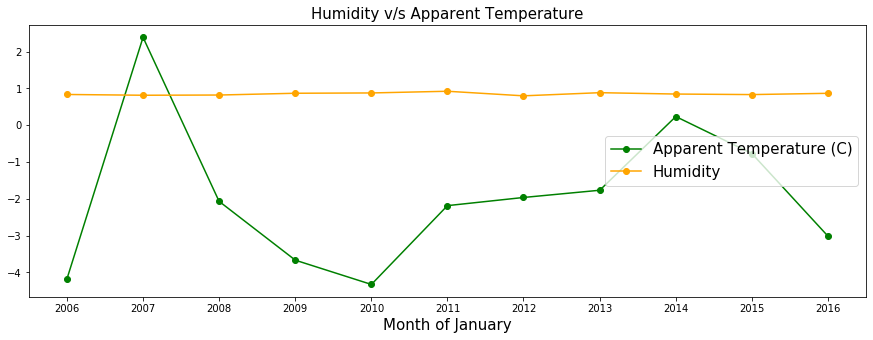

In [9]:
jan = data[data.index.month==1]
plt.figure(figsize=(15,5))
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of January', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)


## February

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

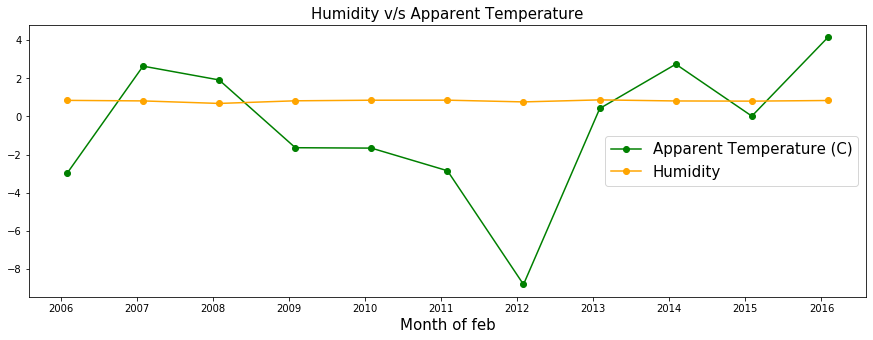

In [10]:
feb = data[data.index.month==2]
plt.figure(figsize=(15,5))
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of feb', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## March

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

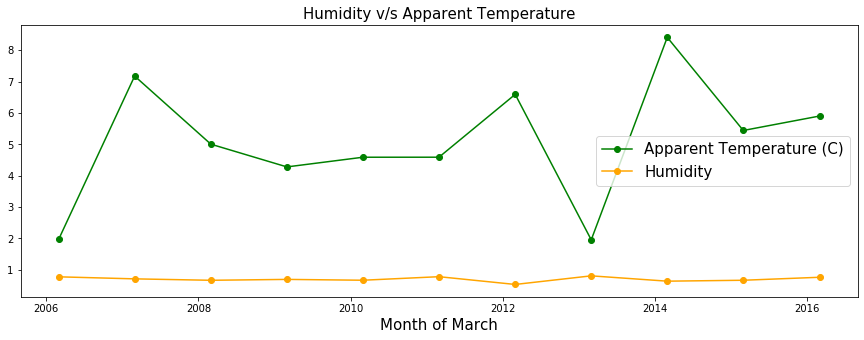

In [11]:
march = data[data.index.month==3]
plt.figure(figsize=(15,5))
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of March', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## May

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

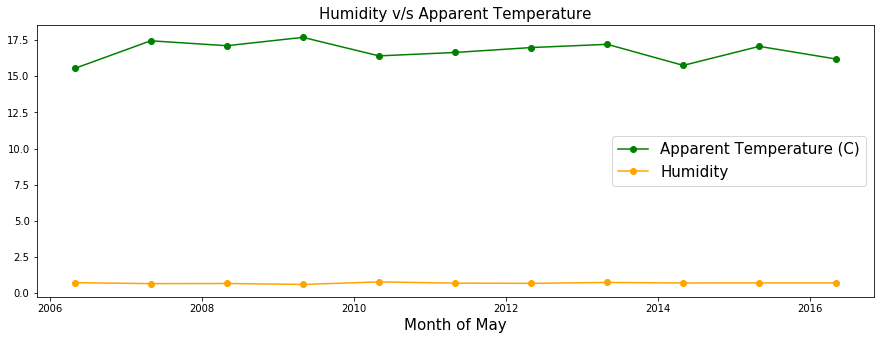

In [12]:
may = data[data.index.month==5]
plt.figure(figsize=(15,5))
plt.plot(may.loc['2006-05-01':'2016-05-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(may.loc['2006-05-01':'2016-05-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of May', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## June

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

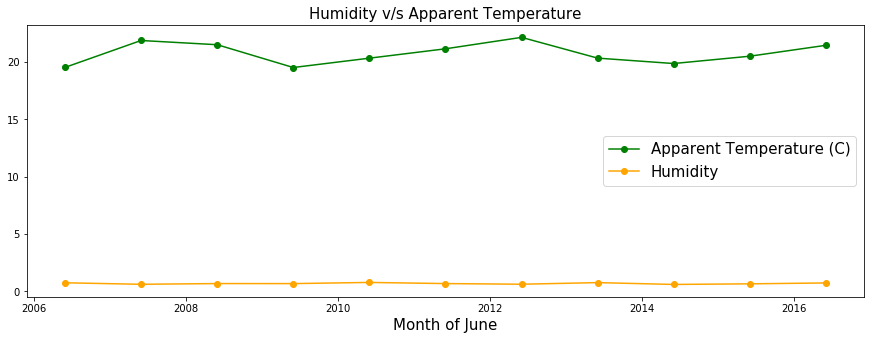

In [13]:
june = data[data.index.month==6]
plt.figure(figsize=(15,5))
plt.plot(june.loc['2006-06-01':'2016-06-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(june.loc['2006-06-01':'2016-06-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of June', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## July


Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

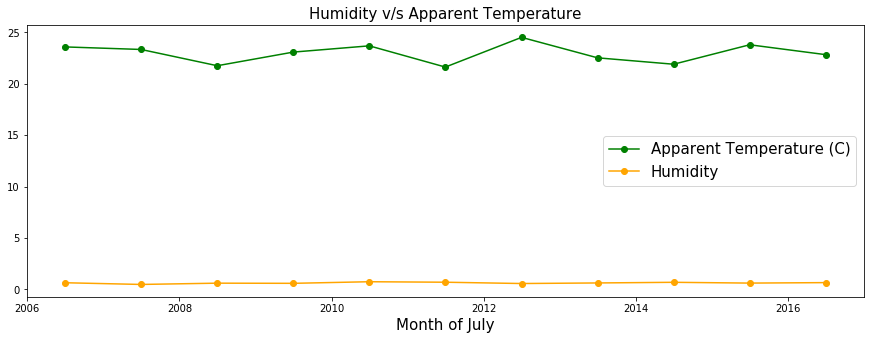

In [14]:
july = data[data.index.month==7]
plt.figure(figsize=(15,5))
plt.plot(july.loc['2006-07-01':'2016-07-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(july.loc['2006-07-01':'2016-07-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of July', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## August

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

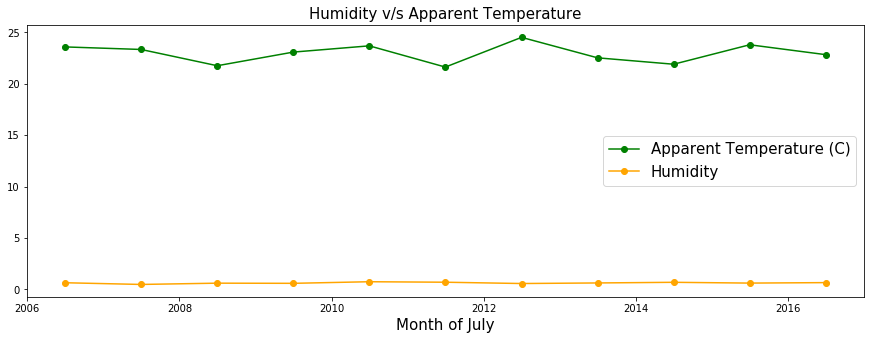

In [15]:
Aug = data[data.index.month==7]
plt.figure(figsize=(15,5))
plt.plot(Aug.loc['2006-07-01':'2016-07-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(Aug.loc['2006-07-01':'2016-07-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of July', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## September

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

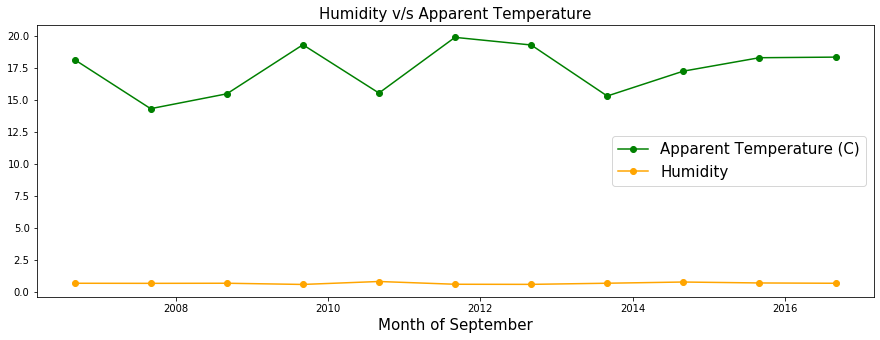

In [16]:
sept = data[data.index.month==9]
plt.figure(figsize=(15,5))
plt.plot(sept.loc['2006-09-01':'2016-09-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(sept.loc['2006-09-01':'2016-09-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of September', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## October

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

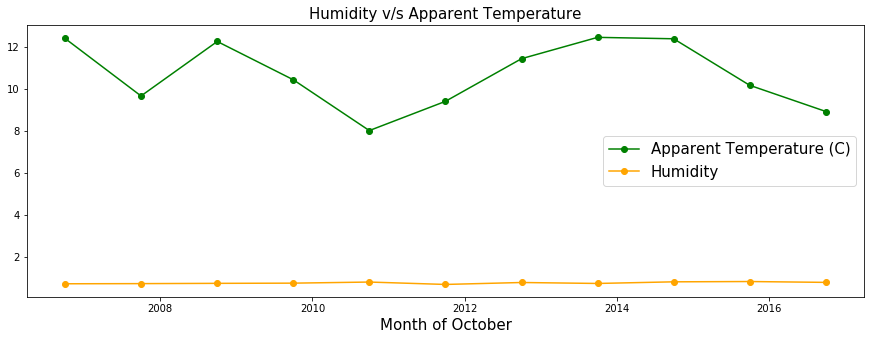

In [17]:
octo = data[data.index.month==10]
plt.figure(figsize=(15,5))
plt.plot(octo.loc['2006-10-01':'2016-10-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(octo.loc['2006-10-01':'2016-10-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of October', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## November

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

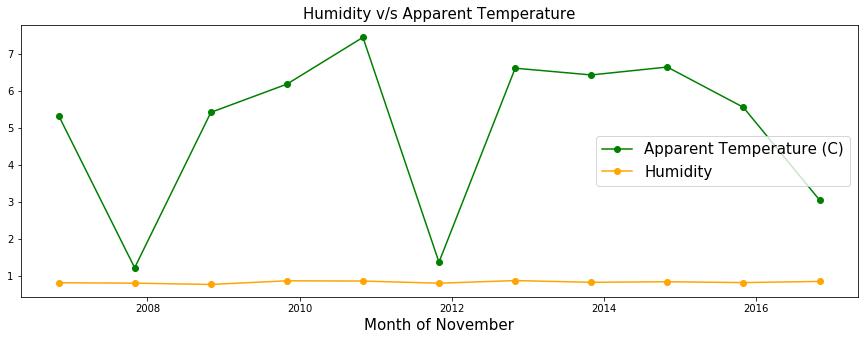

In [18]:
nov= data[data.index.month==11]
plt.figure(figsize=(15,5))
plt.plot(nov.loc['2006-11-01':'2016-11-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(nov.loc['2006-11-01':'2016-11-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of November', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

## December

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

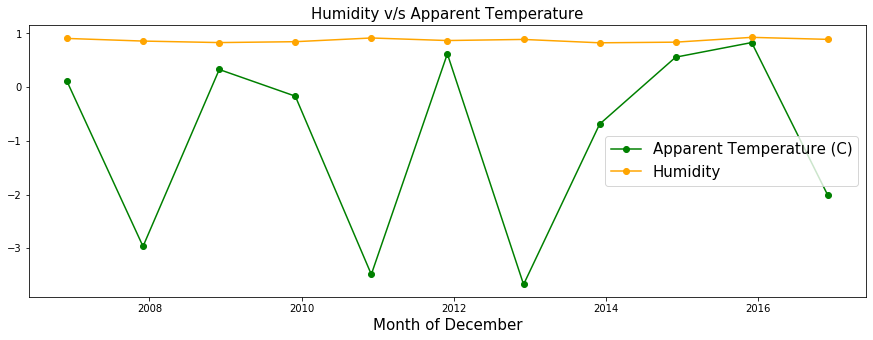

In [19]:
dec = data[data.index.month==12]
plt.figure(figsize=(15,5))
plt.plot(dec.loc['2006-12-01':'2016-12-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(dec.loc['2006-12-01':'2016-12-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of December', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### Anlaysis :
**From the month of april to the month of august there is slightly change in temperature but nearly no change in humidity for the 10 years(2006-2010) . Whereas for the month from september to march there is a vast change in the temperature but again humidity remains unchanged.**

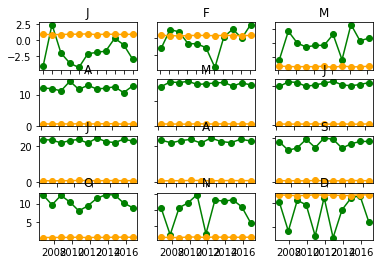

In [22]:
fig, axs = plt.subplots(4,3)
axs[0, 0].plot(jan.loc['2006-01-01':'2016-01-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[0, 0].plot(jan.loc['2006-01-01':'2016-01-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[0, 0].set_title('J')

axs[0,1].plot(feb.loc['2006-02-01':'2016-02-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[0,1].plot(feb.loc['2006-02-01':'2016-02-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[0,1].set_title("F")

axs[0,2].plot(march.loc['2006-03-01':'2016-03-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[0,2].plot(march.loc['2006-03-01':'2016-03-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange')
axs[0,2].set_title("M")

axs[1,0].plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[1,0].plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[1,0].set_title("A")

axs[1,1].plot(may.loc['2006-05-01':'2016-05-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[1,1].plot(may.loc['2006-05-01':'2016-05-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[1,1].set_title("M")

axs[1,2].plot(june.loc['2006-06-01':'2016-06-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[1,2].plot(june.loc['2006-06-01':'2016-06-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[1,2].set_title("J")

axs[2,0].plot(july.loc['2006-07-01':'2016-07-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[2,0].plot(july.loc['2006-07-01':'2016-07-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[2,0].set_title("J")

axs[2,1].plot(Aug.loc['2006-08-01':'2016-08-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[2,1].plot(Aug.loc['2006-08-01':'2016-08-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[2,1].set_title("A")

axs[2,2].plot(sept.loc['2006-09-01':'2016-09-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[2,2].plot(sept.loc['2006-09-01':'2016-09-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[2,2].set_title("S")

axs[3,0].plot(octo.loc['2006-10-01':'2016-10-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[3,0].plot(octo.loc['2006-10-01':'2016-10-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[3,0].set_title("O")

axs[3,1].plot(nov.loc['2006-11-01':'2016-11-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[3,1].plot(nov.loc['2006-11-01':'2016-11-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[3,1].set_title("N")

axs[3,2].plot(dec.loc['2006-12-01':'2016-12-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
axs[3,2].plot(dec.loc['2006-12-01':'2016-12-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
axs[3,2].set_title("D")



#for ax in axs.flat:
    #ax.set(xlabel='Year')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()